# Visualizing the Perfect Cup of Coffee

<b>Background</b>: Coffee fanatics often have theories about coffee's varying quality by region, variety, and growing altitude. Some swear by Costa Rican coffee, or coffee grown at high altitudes. Using a dataset of 207 coffee batches from different regions and of different varieties, this analysis uses data visualizations to analyze whether popular opinions on coffee quality are supported by coffee quality data.

![Screen Shot 2023-07-29 at 10.47.02 PM.png](<attachment:Screen Shot 2023-07-29 at 10.47.02 PM.png>)

<b>Research Questions</b>: 
* How does coffee quality vary by region, variety, altitude, and color? 
* Which region, variety, altitude, and color make the best cup of coffee?

<b>Project Structure</b>:
1. Import Packages and Data
2. Data Pre-Processing
3. Visualizations of Individual Variables
4. Visualizations of Quality by Region, Variety, Altitude, and Color
5. Conclusions: The Perfect Cup of Coffee

<b>Usage:</b> Hover your mouse over bars and points in graphs to see additional information. Toggle graph categories on and off by clicking dots in graph legends.
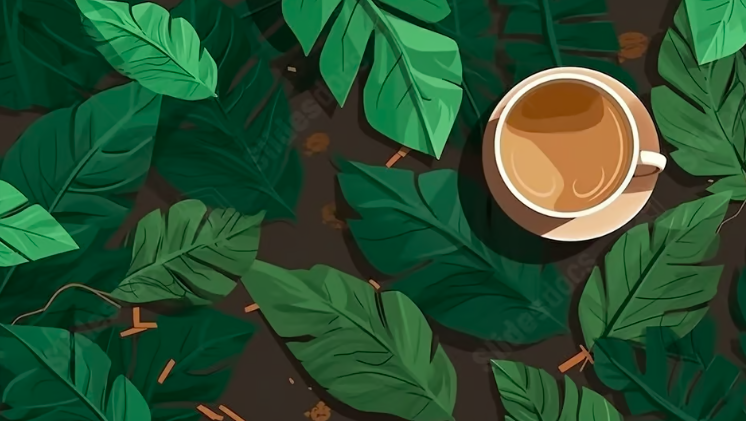

## Import Packages and Data

Necessary packages and data are loaded into the notebook.

In [3]:
import processing

ModuleNotFoundError: No module named 'processing'

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Import Data
coffee = pd.read_excel('/Users/kellyshreeve/Desktop/Data-Sets/df_arabica_clean.xlsx', header=0, index_col=0)

In [3]:
# Print data info 
print(coffee.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Farm Name              205 non-null    object 
 3   Lot Number             206 non-null    object 
 4   Mill                   204 non-null    object 
 5   ICO Number             75 non-null     object 
 6   Company                207 non-null    object 
 7   Altitude               206 non-null    object 
 8   Region                 205 non-null    object 
 9   Producer               206 non-null    object 
 10  Number of Bags         207 non-null    int64  
 11  Bag Weight             207 non-null    object 
 12  In-Country Partner     207 non-null    object 
 13  Harvest Year           207 non-null    object 
 14  Grading Date           207 non-null    object 
 15  Owner 

In [4]:
# Print data head
print(coffee.head(10).to_string())

   ID             Country of Origin                                                 Farm Name                               Lot Number                           Mill                         ICO Number                   Company   Altitude                Region                      Producer  Number of Bags Bag Weight                              In-Country Partner Harvest Year          Grading Date                                           Owner      Variety     Status        Processing Method  Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean Cup  Sweetness  Overall  Defects  Total Cup Points  Moisture Percentage  Category One Defects  Quakers         Color  Category Two Defects            Expiration                              Certification Body                                                                                         Certification Address                                Certification Contact
0   0                      Colombia                          

### Import Data Conclusions

The coffee quality dataframe has 39 columns and 207 observations. Most variables have complete information. Missing a small number of observations are: Farm Name, Lot Number, Mill, Altitute, Region, Producer, Variety, and Processing Method. ICO Number is missing a large number of observations and only present for 75 of the rows. Altitude, Bag Weight, and Harvest Year can be changed to integer data type, Grading Date and Expiration can be changed to datetime. Column names need to be converted to snake case.

## Data Pre-Processing

Column names are converted to snake case, missing values are explored and imputed, data types are addressed, and duplicates are explored.

### Column Names

In [5]:
# Convert column names to snake case
coffee.columns = coffee.columns.str.lower().str.replace(' ', '_')

print(coffee.columns)

Index(['id', 'country_of_origin', 'farm_name', 'lot_number', 'mill',
       'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in-country_partner', 'harvest_year',
       'grading_date', 'owner', 'variety', 'status', 'processing_method',
       'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
       'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects',
       'total_cup_points', 'moisture_percentage', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact'],
      dtype='object')


All column names are now snake case.

### Missing Values

In [6]:
# Display number missing in each column
missing_values = coffee.isna().sum()

display(missing_values)

id                         0
country_of_origin          0
farm_name                  2
lot_number                 1
mill                       3
ico_number               132
company                    0
altitude                   1
region                     2
producer                   1
number_of_bags             0
bag_weight                 0
in-country_partner         0
harvest_year               0
grading_date               0
owner                      0
variety                    6
status                     0
processing_method          5
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
overall                    0
defects                    0
total_cup_points           0
moisture_percentage        0
category_one_defects       0
quakers                    0
color         

There are only a small number of missing values, and they fall largely in columns with string data type. The missing strings will be replaced with 'unknown'. The one misisng altitude value will be dropped from the dataset.

In [7]:
# Replace all missing string values with 'unknown'
str_cols = ['farm_name', 'lot_number', 'mill', 'ico_number', 'region', 'producer', 'variety', 'processing_method']

for col in str_cols:
    coffee[col] = coffee[col].fillna('unknown')
    
# Drop row with missing altitude
coffee = coffee.dropna()

# Re-print missing values
missing_values_new = coffee.isna().sum()

display(missing_values_new)

id                       0
country_of_origin        0
farm_name                0
lot_number               0
mill                     0
ico_number               0
company                  0
altitude                 0
region                   0
producer                 0
number_of_bags           0
bag_weight               0
in-country_partner       0
harvest_year             0
grading_date             0
owner                    0
variety                  0
status                   0
processing_method        0
aroma                    0
flavor                   0
aftertaste               0
acidity                  0
body                     0
balance                  0
uniformity               0
clean_cup                0
sweetness                0
overall                  0
defects                  0
total_cup_points         0
moisture_percentage      0
category_one_defects     0
quakers                  0
color                    0
category_two_defects     0
expiration               0
c

All missing values have been filled or dropped. There are no longer missing values in the dataset.

### Data Types

 Data values and data type for altitude are fixed. While harvest year, bag weight, grading date, and expiration were also not loaded with correct data types, they are not used in this analysis, and their data types are left as is.

In [8]:
# Examine altitude values
print(coffee['altitude'].unique())

['1700-1930' 1200 1300 1900 '1850-2100' 1668 1250 '1400-1700' '1800-2200'
 2000 '1900-2000' 1850 1100 '1900-2100' '1570-1600' 850 '1500-1700' 1350
 1060 600 '150-250' 668 1950 '2150 - 2350' 1700 650 '1600-1900' '300-500'
 1000 800 1905 150 1600 4700 '350-400' 230 1750 1654 1400 4895 '200-300'
 700 1450 520 1368 1943 400 '1300-1400' 2361 1500 2100 '1250-1350'
 '1500-1600' 1800 '1600-1750' 1411 '4895 A 5650' '400-600' '200-400' 1470
 '250-400' '250-300' '1200 - 1580' '1400 - 1900' '1280-1325' 300 750
 '1300-1500' 950 '1100-1200' 1390 340 '1200 - 1300' 1650 1280 900 165 465
 640 1340 139 '1200-1350' 1040 140 '1500-1950' 460 500 '800-1200'
 '1350-1550' '1200~1600' 5400 '900-1000' 1574 435 '600-800' '1300-1800'
 '850-1100']


Altitude is a numeric variables that has been loaded as object because some cells contain ranges of values. To address this issue, ranges are replaced with the average of the two values and converted to float data type.

In [9]:
# Create new altitude_mean variable and replace all dash characters with regular dash '-'
coffee['altitude_mean'] = coffee['altitude'].str.replace('~', '-').str.replace(' ', '').str.replace('A', '-')

# Split range altitudes by dash into two columns, change to float, and calculate mean of the two values
coffee['altitude_mean'] = coffee['altitude_mean'].str.split('-', expand=True).astype('float64').mean(axis=1)

# Fill rows that didn't have a range range back in with their singular altitude values
coffee['altitude_mean'] = coffee['altitude_mean'].fillna(coffee['altitude'])

# Extract data type
altitude_mean_dtype = coffee['altitude_mean'].dtype

# Print result
print(f'Altitude Mean Data Type: {altitude_mean_dtype}')
print()
display(coffee[['altitude', 'altitude_mean']])


Altitude Mean Data Type: float64



,altitude,altitude_mean
0,1700-1930,1815.0
1,1200,1200.0
2,1300,1300.0
3,1900,1900.0
4,1850-2100,1975.0
...,...,...
202,950,950.0
203,1200,1200.0
204,1300,1300.0
205,1200,1200.0


### Duplicates

Data is checked for full duplicates and color, country name, and variety are checked for implicit duplicates.

#### Full Duplicates

In [10]:
# Check for full duplicates
duplicates = coffee.duplicated().sum()

print(f'The number of full duplicates is: {duplicates}')

The number of full duplicates is: 0


There are no full duplicates in the dataset.

#### Color Duplicates

In [11]:
# Check for implicit duplicates in color
print(coffee['color'].unique())


['green' 'blue-green' 'yellowish' 'yellow-green' 'yellow green' 'greenish'
 'brownish' 'yellow- green' 'browish-green' 'bluish-green' 'pale yellow'
 'yello-green']


There are a number of implicit duplicates in color. Like colors will be combined into single categories.

In [12]:
# Replace all yellow-green options with 'yellow-green'
yellow_greens = ['yellow green', 'yellow- green', 'yello-green']

for yellow in yellow_greens:
    coffee['color'] = coffee['color'].replace(yellow, 'yellow-green')
    
# Replace all blue-green options with 'blue-green'
coffee['color'] = coffee['color'].replace('bluish-green', 'blue-green')

# Replace all yellow options with 'pale-yellow'
coffee['color'] = coffee['color'].replace(['yellowish', 'pale yellow'], 'pale-yellow')

# Replace greenish with 'green'
coffee['color'] = coffee['color'].replace('greenish', 'green')

# Replace browns with 'brown'
coffee['color'] = coffee['color'].replace(['brownish', 'browish-green'], 'brown')

# Print result
print(f"Unique Color Values: {coffee['color'].unique()}")
print()
print('Frequencies of Colors:')
print(coffee['color'].value_counts())

Unique Color Values: ['green' 'blue-green' 'pale-yellow' 'yellow-green' 'brown']

Frequencies of Colors:
green           136
blue-green       33
yellow-green     17
pale-yellow      10
brown            10
Name: color, dtype: int64


Color categories are combined and categories each have reasonable numbers of values.

#### Country Duplicates

In [13]:
# Check for implicit duplicates in country of origin
sorted(coffee['country_of_origin'].unique())

['Brazil',
 'Colombia',
 'Costa Rica',
 'El Salvador',
 'Ethiopia',
 'Guatemala',
 'Honduras',
 'Indonesia',
 'Kenya',
 'Laos',
 'Madagascar',
 'Mexico',
 'Myanmar',
 'Nicaragua',
 'Panama',
 'Peru',
 'Taiwan',
 'Tanzania, United Republic Of',
 'Thailand',
 'Uganda',
 'United States (Hawaii)',
 'Vietnam']

There are no implicit duplicates in country, though Tanzania can be shorted to simply 'Tanzania'.

In [14]:
# Shorten Tanzania to 'Tanzania'
coffee['country_of_origin'] = coffee['country_of_origin'].replace(
    'Tanzania, United Republic Of', 'Tanzania')

coffee['country_of_origin'].value_counts()

Taiwan                    61
Guatemala                 21
Colombia                  18
Honduras                  13
Thailand                  12
Ethiopia                  11
Brazil                    10
Costa Rica                 8
Nicaragua                  7
El Salvador                7
Tanzania                   6
United States (Hawaii)     5
Mexico                     4
Peru                       4
Vietnam                    4
Uganda                     3
Indonesia                  3
Laos                       3
Panama                     2
Kenya                      2
Madagascar                 1
Myanmar                    1
Name: country_of_origin, dtype: int64

Tanzania has been shorted to 'Tanzania'. There are no other implicit country duplicates.

#### Variety Duplicates

In [15]:
# View unique coffee varieties
sorted(coffee['variety'].unique())

['BOURBON, CATURRA Y CATIMOR',
 'Bourbon',
 'Bourbon Sidra',
 'Bourbon, Catimor, Caturra, Typica',
 'Castillo',
 'Castillo Paraguaycito',
 'Castillo and Colombia blend',
 'Castillo,Caturra,Bourbon',
 'Catimor',
 'Catimor,Catuai,Caturra,Bourbon',
 'Catrenic',
 'Catuai',
 'Catuai and Mundo Novo',
 'Catucai',
 'Caturra',
 'Caturra,Colombia,Castillo',
 'Caturra-Catuai',
 'Ethiopian Heirlooms',
 'Gayo',
 'Gesha',
 'Java',
 'Jember,TIM-TIM,Ateng',
 'Lempira',
 'MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI',
 'Maragogype',
 'Mundo Novo',
 'Pacamara',
 'Pacas',
 'Parainema',
 'Red Bourbon',
 'Red Bourbon,Caturra',
 'SHG',
 'SL14',
 'SL28',
 'SL28,SL34,Ruiru11',
 'SL34',
 'Santander',
 'Sarchimor',
 'Sl34+Gesha',
 'Typica',
 'Typica + SL34',
 'Typica Bourbon Caturra Catimor',
 'Typica Gesha',
 'Wolishalo,Kurume,Dega',
 'Yellow Bourbon',
 'Yellow Catuai',
 'unknow',
 'unknown']

While there are some similar varities, none of the varieties are exact duplicates of each other and all strains vary in taste and quality. These strains will be kept as-is. Values will only be modified to combine 'unkow' with 'unknown'.

In [16]:
# Replace 'unkow' with 'unkown'
coffee['variety'] = coffee['variety'].replace('unkow', 'unknown')

Unknown categories are combined. All other varieties have been kept as-is.

### Prepare Data Conclusions

Column names are changed to snake case, missing values are addressed, data values and types have been fixed, and the data has been check for full and implicit duplicates. The data is clean, prepared, and ready for analysis.

## Visualizations of Individual Variables

Each variable is plotted individually to visualize and analyze their individual distributions. Country of origin and color are plotted with bar graphs, and altitude and coffee quality are plotted with histograms. Outliers will be eliminated from the analysis as well as variables with no variation.

In [17]:
# Bar plot of country of origin
country = px.histogram(coffee, x='country_of_origin', title='Number of Coffee Batches by Country',
                       labels={'count':'Number of Batches', 'country_of_origin':'Country of Origin'}, 
                       width=1100, height=600, color_discrete_sequence=[px.colors.qualitative.Antique[6]],
                       text_auto=True)

country.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

country.update_layout(xaxis={'categoryorder':'total descending'})
country.update_layout(yaxis_title='Number of Batches')

country.show()

Taiwan has the largest number of coffee batches in the dataset, with three times as many batches as the next highest producing country. It's followed by Guatemala, Columbia, Honduras, and Thailand as the next highest producing countries. A number of countries only have 1-2 observations in the dataset. These low producing countries will be dropped in futher country analysis.

In [18]:
# Bar plot of top varieties
# Subset varieties that have at least two batches and known variety names
top_varieties = coffee['variety'].value_counts().reset_index().rename(columns={'variety':'number_of_variety'})

top_varieties = top_varieties[(top_varieties['number_of_variety'] >= 2) 
                              & (top_varieties['index'] != 'unknown')]['index']

# Plot batches by variety for top varieties
variety = px.histogram(coffee[coffee['variety'].isin(top_varieties)], x='variety', 
                       title='Number of Coffee Batches by Variety',
                       labels={'variety':'Top Varieties'}, 
                       width=1000, height=600, color_discrete_sequence=[px.colors.qualitative.Antique[6]],
                       text_auto=True)

variety.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

variety.update_layout(xaxis={'categoryorder':'total descending'})
variety.update_layout(yaxis_title='Number of Batches')

variety.show()

Caturra and Gesha are tied as most common coffee varieties in the dataset. These are followed by Typica, Bourbon, and Catuai varieties as the next highest represented strains.

In [19]:
# Bar plot of color
color = px.histogram(coffee, x='color', title='Number of Coffee Batches by Color',
                     labels={'color':'Color'}, width=1000, height=600, 
                     color_discrete_sequence=[px.colors.qualitative.Antique[6]], text_auto=True)

color.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

color.update_layout(xaxis={'categoryorder':'total descending'})
color.update_layout(yaxis_title='Number of Batches')

color.show()

The most common color coffee bean is green, with five times as many green coffee beans as any other color. The next most common color is blue-green, followed by yellow-green, brown, and pale yellow.

In [20]:
# Plot histogram for altitude
alt = px.histogram(coffee, x='altitude_mean', title='Number of Coffee Batches by Altitude',
                     labels={'altitude_mean':'Altitude'}, width=1000, height=600,
                     color_discrete_sequence=[px.colors.qualitative.Antique[6]],)

alt.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

alt.update_layout(yaxis_title='Number of Batches')

alt.show()

Altitude is fairly normally distributed and ranges from 0 to over 5000. The most common altitude is around 1300 and this is also the approximate median of the distribution. Altitude has two likely outliers around 5000 that will be dropped from the dataset.

In [21]:
# Drop observations with altitude greater than 4000 
coffee = coffee[coffee['altitude_mean'] < 4000]

Coffee Quality Variables:



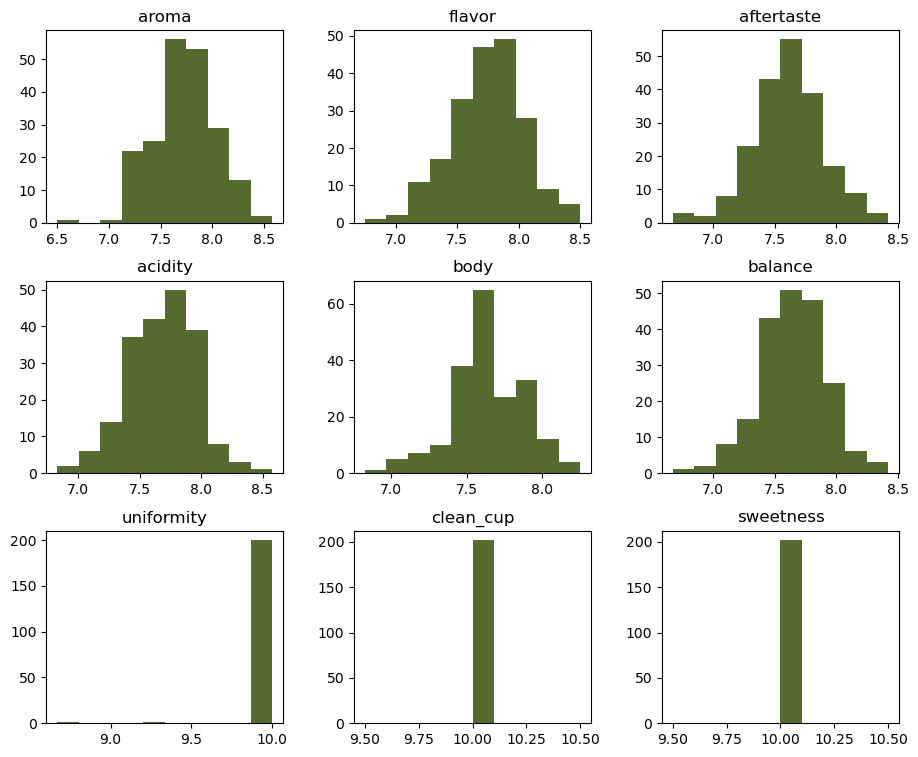

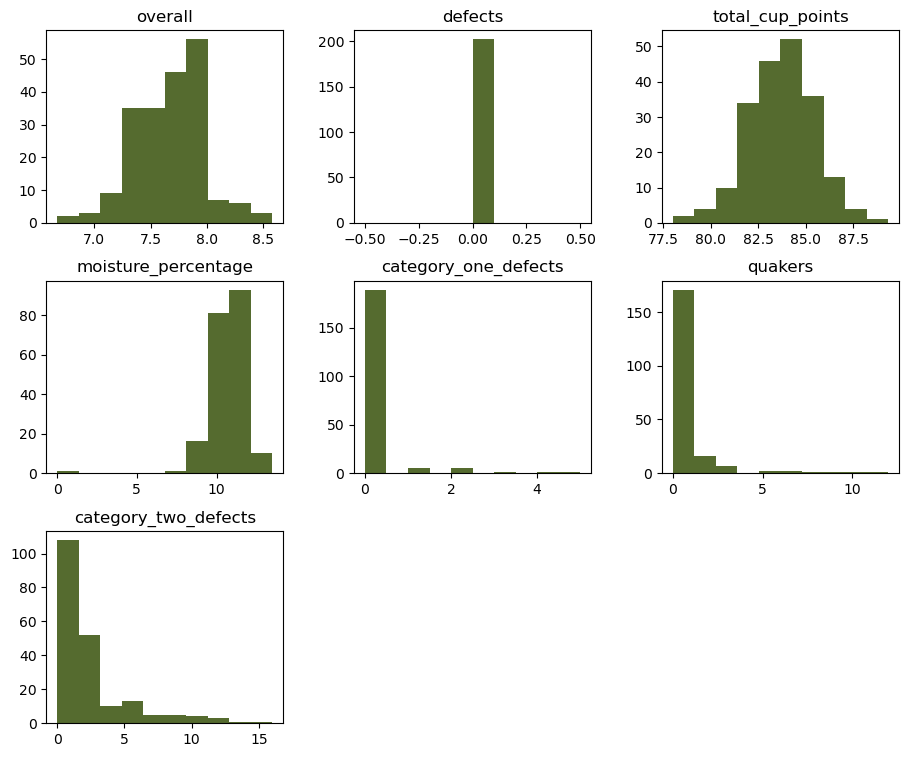

In [22]:
# Plot quick histograms for each quality variable
print('Coffee Quality Variables:')
print()
for i in range(19, 32, 9):
    coffee.iloc[:, i:i+9].hist(figsize=(11, 9), color='darkolivegreen', grid=False)
    plt.tight_layout    
    plt.show()

In viewing the initial histograms of each quality variable, variables that are fairly normally distributed and will be further visualized are: aroma, flavor, aftertaste, acidity, body, balance, overall, total_cup_ponts, and moisture percentage. Category two defects is left-skewed, but given its reasonable variation, will be left in the analysis. Interestingly, some quality measures have very little spread, including uniformity, clean cup, sweetness, defects, and category one defects. For this reason, these variables with no variation will not be further analyzed. There are a few ouliers at the low end of the moisture percentage distribution that will be removed from the data.

In [23]:
# Remove observation with moisture percentage less than 5
coffee = coffee[coffee['moisture_percentage'] > 5]

### Individual Variable Visualization Conclusions

The countries with the most observations in the data set are Taiwan, Colombia, Guatemala and Honduras and the most common strains are Cattura, Gesha, Typica, and Bourbon. Green is the the most common color coffee bean. Altitude is fairly normally distributed and varies between 0 and 2500 with a median around 1300. Outliers in altitude and moisture percentage were removed from the dataset and coffee quality variables with no variation and were taken out of the analysis. Coffee quality varibles that will be investigated going forward are: aroma, flavor, aftertaste, acidity, body, balance, overall, category two defects, moisture percentage, and total cup points.

## Visualizations of Quality by Region, Variety, Altitude, and Color

Coffee quality is broken down by region, variety, and color in bar plots and box plots to determine which regions, varieties, and colors lead to better quality coffee. Additionally, the relationship between quality and altitude and category two defects and altitude is visualized with scatterplots to determine relationship between altitude and quality.

### Coffee Quality by Country

In [24]:
# Compare average coffee quality in countries with 4 or more batches
top_countries = coffee['country_of_origin'].value_counts().reset_index().rename(columns={'country_of_origin':'number_of_countries'})

top_countries = top_countries[top_countries['number_of_countries'] >= 4]['index']

quality_by_country = px.histogram(coffee[coffee['country_of_origin'].isin(top_countries)], x='country_of_origin', 
                                  y=['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'overall'], 
                                  histfunc="avg", title='Average Coffee Quality Measures by Country', 
                                  barmode='group', width=1200, height=500,
                                  color_discrete_sequence=[px.colors.qualitative.Antique[1],
                                                                            px.colors.qualitative.Antique[2],
                                                                            px.colors.qualitative.Antique[3],
                                                                            px.colors.qualitative.Antique[4],
                                                                            px.colors.qualitative.Antique[8],
                                                                            px.colors.qualitative.Antique[6],
                                                                            px.colors.qualitative.Antique[5]])

quality_by_country.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

quality_by_country.update_layout(xaxis={'categoryorder':'total descending'})
quality_by_country.update_layout(yaxis_title='Average Score', xaxis_title='Country of Origin')

quality_by_country.show()

The bar plot of average coffee quality scores across countries shows all coffee quality measures have similar height bars within each country and across the countries. This means there is not a large difference in average coffee quality measures within each country nor across the countries. For example, aroma rating is highest in Ethiopia, with an average rating of 7.86 points, and lowest in El Salvador, with an average of 7.33 points, a spread of only 0.5 points. Within Ethiopia, the quality with the highest rating is acidity with an average of 8.01 points and the quality with the lowest rating is aftertaste with an average of 7.76 points, a spread of only 0.25 points. This pattern hold across countries and quality measures, with average quality varying by only about 0.5 points. Based on this graph, there is little evidence that average coffee quality varies substantially by country of origin.

In [25]:
# Boxplot of total cup points by country
quality_country_box = px.box(coffee[coffee['country_of_origin'].isin(top_countries)], x='country_of_origin', 
                                  y='total_cup_points', 
                                  title='Distribution of Total Cup Points by Country (Hover to see quartiles, variety, and region)',
                                  color_discrete_sequence=[px.colors.qualitative.Antique[6]],
                                  hover_data=['country_of_origin', 'variety', 'region'],
                                  width=1100, height=600)

quality_country_box.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

quality_country_box.update_layout(yaxis_title='Total Cup Points', xaxis_title='Country of Origin')

quality_country_box.show()

The country with the highest total cup point median is Ethiopia at 85.25 points, followed by Taiwan at 84.58 and Tanzania at 84.42. Countries with the lowest total cup point medians are Brazil at 81.79 and Peru at 82.09. Brazil has the highest coffee cup point varitation with batches rated between 78 and 86 points, and Mexico has the smallest variation with cups rated between 82 and 85 points. Columbia has the single highest rated cup at 89 points. Though the boxplots help to flush out the distribution of quality by country, it should be noted that these are still almost negligable differences, varying by only about 10 points from lowest rated cup to highest rated cup, on a scale of 100. Though some cups are slightly better than others, they all have fairly high ratings. There is overlap in all the boxplots and therefore is likely no significant difference in total cup points between any countries.

### Coffee Quality by Variety

In [26]:
# Compare average coffee quality across top varieties
quality_by_variety = px.histogram(coffee[coffee['variety'].isin(top_varieties)], x='variety', 
                                  y=['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'overall'], 
                                  histfunc="avg", title='Average Coffee Quality Measures by Variety', 
                                  labels={'variety':'Top Varieties'},
                                  barmode='group', color_discrete_sequence=[px.colors.qualitative.Antique[1],
                                                                            px.colors.qualitative.Antique[2],
                                                                            px.colors.qualitative.Antique[3],
                                                                            px.colors.qualitative.Antique[4],
                                                                            px.colors.qualitative.Antique[8],
                                                                            px.colors.qualitative.Antique[6],
                                                                            px.colors.qualitative.Antique[5]])

quality_by_variety.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

country.update_layout(xaxis={'categoryorder':'total descending'})

quality_by_variety.show()

Assessing the average coffee quality by variety, average coffee quality does vary some by variety and varies more by coffee variety than it did by country of origin. The average quality scores vary by as much as 1 point. For example, average aroma is highest in the Gesha strain at 8.04 points and lowest in Maragogype at 6.92 points, a spread of 1.12 points. Other quality variables follow a similar patter with overall quality highest again in the Gesha variety at 7.98 points and lowest in the Maragogype variety at 7.17 points, a spread of 0.81 points. Quality scores do not vary much within country, meaning if a country recieves high scores on one quality variable, it's likely to recieve high scores on the other quality variables as well. 

In [27]:
# Boxplot of total cup points by variety
quality_variety_box = px.box(coffee[coffee['variety'].isin(top_varieties)], x='variety', 
                                  y='total_cup_points', title='Distribution of Total Cup Points by Variety',
                                  color_discrete_sequence=[px.colors.qualitative.Antique[6]],
                                  hover_data=['country_of_origin', 'variety', 'region'],
                                  width=1100, height=600)

quality_variety_box.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

quality_variety_box.update_layout(yaxis_title='Total Cup Points', xaxis_title='Variety')

quality_variety_box.show()

Boxplots of total cup points by variety further distinguish quality by variety. This plot shows a few clear variety 'winners' of Gesha, SL34, and Ethiopian Herilooms which all have total cup point distributions with end points between 83 and 87/88. Additional high scoreres are Java, Bourbon, Caturra, Catimor, and SL28. There are also a few strains that have distinctly lower scores, SHG, Mundo Novo, and Maragogype, which have distributions between 78 and 84 total cup points. The distinction between high and low scorers is more distinct by variety than by region, though these distributions again vary by only about 10 points from lowest to highest scoring cup.

### Coffee Quality by Color

In [28]:
# Compare average coffee quality by color
quality_by_color = px.histogram(coffee, x='color', 
                                  y=['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'overall'], 
                                  histfunc="avg", title='Average Coffee Quality Measures by Color', 
                                  labels={'color':'Color'},
                                  barmode='group', color_discrete_sequence=[px.colors.qualitative.Antique[1],
                                                                            px.colors.qualitative.Antique[2],
                                                                            px.colors.qualitative.Antique[3],
                                                                            px.colors.qualitative.Antique[4],
                                                                            px.colors.qualitative.Antique[8],
                                                                            px.colors.qualitative.Antique[6],
                                                                            px.colors.qualitative.Antique[5]])

quality_by_color.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

country.update_layout(xaxis={'categoryorder':'total descending'})

quality_by_color.show()

Average coffee quality scores vary least by color, with average coffee quality scores almost identical within color group and across colors. The highest  quality score is brown beans flavor at an average of 7.92 points, though this is contrasted with the lowest scoring quality of aftertaste in blue-green beans of an average of 7.55, a spread of only 0.37 from lowest to highest average quality rating across colors. There is negligable difference in average quality markers across bean color.

In [29]:
# Boxplot of total cup points by color
quality_color_box = px.box(coffee, x='color', y='total_cup_points', 
                           title='Distribution of Total Cup Points by Color',
                            color_discrete_sequence=[px.colors.qualitative.Antique[6]],
                            width=1100, height=600)

quality_color_box.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

quality_color_box.update_layout(yaxis_title='Total Cup Points', xaxis_title='Color')

quality_color_box.show()

Boxplots of total cup points by color again shows nearly identical distributions of quality by color. Each color has a median between 83 - 85 points and have almost fully overlapping inter quartile ranges. There is evidence that coffee quality does not vary by bean color.

### Coffee Quality by Altitude

In [30]:
quality_by_altitude = px.scatter(coffee[coffee['country_of_origin'].isin(top_countries)], 
                                 x='altitude_mean', y='total_cup_points',
                                 title='Total Cup Point by Altitude (Hover to see variety and region, click legend bubbles to toggle countries on and off)',
                                 labels={'total_cup_points':'Total Cup Points', 
                                         'altitude_mean':'Altitude'},
                                 color='country_of_origin',
                                 color_discrete_sequence=px.colors.qualitative.Antique,
                                 hover_data=['country_of_origin', 'variety', 'region'],
                                 width=1200, height=600)
quality_by_altitude.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
    })


quality_by_altitude.show()

The scatter plot of total cup quality by altitude shows a fairly consistent distribution of total cup points across altitudes. There is not a strong relationship betwen these two variables, though there is a slight uptick in total cup points at the highest altitudes. 

In [31]:
# Scatter plots of quality measures by altitude
y_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'overall']

for column in y_columns:
    quality_scatter = px.scatter(coffee[coffee['country_of_origin'].isin(top_countries)], 
                                 x='altitude_mean', y=column,
                                 title=(f'{column.capitalize()} by Altitude'),
                                 labels={column:column.capitalize(), 'altitude_mean':'Altitude'},
                                 color='country_of_origin',
                                 color_discrete_sequence=px.colors.qualitative.Antique,
                                 hover_data=['country_of_origin', 'variety', 'region'],
                                 width=1200, height=600)
    
    quality_scatter.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
    })

    quality_scatter.show()

Scatter plots of aroma, flavor, aftertaste, acidity, body, balance, and overall rating vs altitude show a similar patter to total cup score by altitude. Quality scores are not strongly related to altitude, though there does appear to be a small increase in total cup quality at the highest altitudes. This is especially true for aftertaste, acidity, and body, which appear to have the biggest increase in total cup points at the highest altitudes.

In [32]:
# Compare average defects in countries with 4 or more batches
defects_by_country = px.histogram(coffee[coffee['country_of_origin'].isin(top_countries)], x='country_of_origin', 
                                  y='category_two_defects', 
                                  histfunc="avg", title='Average Category Two Defects by Country', 
                                  barmode='group', width=1200, height=500, 
                                  color_discrete_sequence=[px.colors.qualitative.Antique[6]])

defects_by_country.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

defects_by_country.update_layout(xaxis={'categoryorder':'total descending'})
defects_by_country.update_layout(yaxis_title='Average Category Two Defects', xaxis_title='Country of Origin')

defects_by_country.show()

A barplot of average category two defects by country shows that some countries have much higher average defects than others. El Salvador has the highest average defects at 6 defects, followed by ethiopia at 4.5 defects and Peru at 4 defects. Countries with the lowest average defects are Guatemala at 1.7 defects, Costa Rica at 1.5 defects and Taiwan at 0.5 average defects.

In [33]:
defects_by_altitude = px.scatter(coffee, x='altitude_mean', y='category_two_defects', 
                                 title=('Category Two Defects by Altitude'), 
                                 labels={'altitude_mean':'Altitude', 
                                         'category_two_defects':'Category Two Defects'},
                                 color='country_of_origin',
                                 color_discrete_sequence=px.colors.qualitative.Antique,
                                 hover_data=['country_of_origin', 'variety', 'region'],
                                 width=1200, height=600)

defects_by_altitude.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
    })

defects_by_altitude.show()

Category two defects are not strongly related to altitude, though batches with the highest number of defects do occur at the highest altitudes.

### Vizualisations of quality by region, variety, color, and altitude conclusions

Average quality does not vary substantially by country of origin or by color bean. However, if choosing a country, Columbia has the single-best cup of coffee and Ethiopia has the best consistently high scoring coffees. There is more variation in average quality by variety, though these differences are still rather small, the varieties with the highest scoring coffee are Gesha, Java, and SL34. There is not a strong association between altitude and any measure of quality, though total cup quality, aftertaste, acidity, and body do all have a slight uptick at the highest altitudes. Coffee quality two defects do vary largely by country and are most common in coffee from El Salvador, Ethiopia, and Peru. Category two defects are not highly related to altitude, though coffees with the highest defects to occur at moderately high altitudes. 

## Conclusions: The Perfect Cup of Coffee

A visual analysis of coffee quality by country of origin, variety, color, and altitude was conducted to determine which factors make the best cup of coffee. The coffee quality measures used in this analysis were aroma, flavor, aftertaste, acidity, body, balance, overall score, and total cup score. It was found that coffee quality varies very little from country to country and from color to color on all quality measures, but that there is slightly more variation in quality based on variety. Additionally, there are small upticks in some coffee quality measures at the highest altitudes, though these altitudes also tend to have more quality defects.

So, what makes the perfect cup of coffee? Based on the coffees in this data, you're better off choosing coffee by strain than by country, particularly Gesha, Java, SL34, and Ethiopian Hierlooms tend to be consistently highly rated in all quality areas. Generally, you can't know which coffee will be the best based only on country of origin, though Columbia does grow the single most highly rated coffee in the Piendamo, Cauca region, and Ethiopian coffees are rated the highest most consistently. Definitely don't choose coffee based on bean color. You can expect that coffee grown at higher altitudes will have slightly better quality across multiple quality measures than coffee grown at low altitudes.

But ultimately, the coffee batches in this data were all outstanding quality and rated consistently high, with total cup points only varying between 78 and 90 points out of a possible 100. This dataset represents some high quality coffee, and we can only determine so much about what makes good and bad coffee from a dataset with all outstanding quality. In the future, I'd bring in additional data with larger quality variation. I'd also look into more factors that can affect quality, such as rain fall, humidity, and shade levels to determine if those have a marked impact on quality.

So, we have some hints as to what factors predict quality, the biggest of which seem to variety and altitude. Country doesn't appear to effect quality in this dataset, and bean color certainly doesn't. But any of us should be happy to drink any coffee on this list, and which is best of a list of most highly rated coffees may come down to personal preference. Coffee connoisseurs will have to continue to drink on, as we continue the search for the perfect cup of coffee.